# Maternal Health Risk Analysis and Classification

## Problem Identification

Many pregnant women die from complications of pregnancy because of not having enough information about maternal health
care during pregnancy and post-pregnancy. Every moment should be monitored during pregnancy for the healthy development 
of fetal and for making sure of the harmless delivery. Proper care and diagnosis at the beginning of pregnancy can help
to reduce the preventable death of pregnant women and neonatal especially in rural areas.

we will analyze several attributes that affect the health of pregnant women. We will also create a machine learning model to predict the level of health risk for pregnant women.

### Importing Packages and Dataset

In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### 1. Data Importing

In [3]:
import pandas as pd
data = pd.read_csv (r"F:\IMARTICUS\Project\Maternal Health Risk Data Set.csv")

#first few rows
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### 2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

### Variable Description and Identification

##### Variable Description
We can see total 6 variables, and each variables has 1014 observations. Here comes the description of all variables:

Age: Any ages in years when a women during pregnant.
SystolicBP: Upper value of Blood Pressure in mmHg.
DiastolicBP: Lower value of Blood Pressure in mmHg,
BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
BodyTemp: Women body temperature.
HeartRate: A normal resting heart rate in beats per minute.
Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.
Here, we have Risk Level as target variable, and the rest of the variables are predictor variables.



#### Variable Data Types

Categorical Variable: Risk Level.

Numerical Variable: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate.

### 2.1. Data Type and conversion

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
data.shape

(1014, 7)

### 2.2. Identifying & Treatment Missing Value

In [6]:
### count the number of NaN values in each column
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

* there's no null/missing values in this dataset.

<AxesSubplot:>

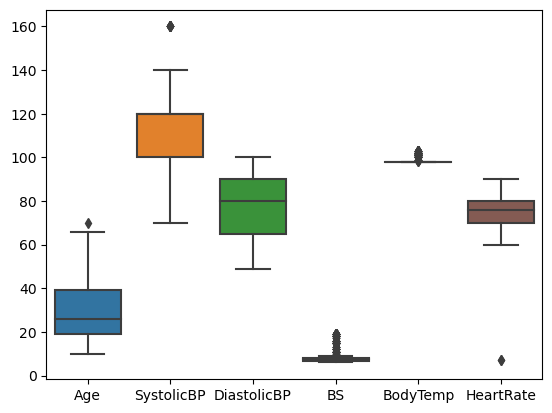

In [7]:
import seaborn as sns
sns.boxplot(data = data)

In [8]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [9]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

IQR = Q3- Q1
upper_limit= Q3 + 1.5*IQR
upper_limit

69.0

In [10]:
data['Age']=np.where(data['Age']> upper_limit,upper_limit,data['Age'])

In [11]:
Q1 = data['SystolicBP'].quantile(0.25)
Q3 = data['SystolicBP'].quantile(0.75)

IQR = Q3- Q1
upper_limit= Q3 + 1.5*IQR
upper_limit

150.0

In [12]:
data['SystolicBP']=np.where(data['SystolicBP']> upper_limit,upper_limit,data['SystolicBP'])

In [13]:
Q1 = data['BS'].quantile(0.25)
Q3 = data['BS'].quantile(0.75)

IQR = Q3- Q1
upper_limit= Q3 + 1.5*IQR
upper_limit

9.649999999999999

In [14]:
data['BS']=np.where(data['BS']> upper_limit,upper_limit,data['BS'])

In [15]:
Q1 = data['BodyTemp'].quantile(0.25)
Q3 = data['BodyTemp'].quantile(0.75)

IQR = Q3- Q1
upper_limit= Q3 + 1.5*IQR
upper_limit

98.0

In [16]:
data['BodyTemp']=np.where(data['BodyTemp']> upper_limit,upper_limit,data['BodyTemp'])

In [17]:
Q1 = data['HeartRate'].quantile(0.25)
Q3 = data['HeartRate'].quantile(0.75)

IQR = Q3- Q1
lower_limit= Q1 - 1.5*IQR
lower_limit

55.0

In [18]:
data['HeartRate']=np.where(data['HeartRate']<lower_limit,lower_limit,data['HeartRate'])

<AxesSubplot:>

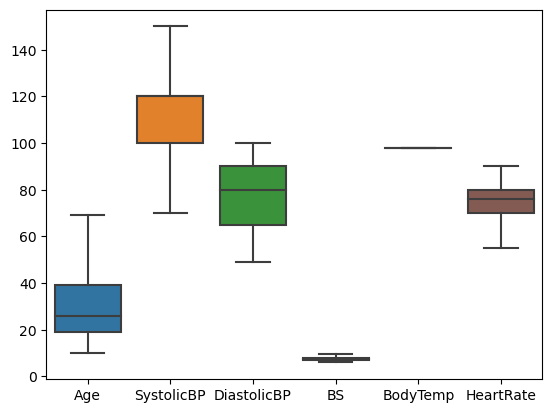

In [19]:
sns.boxplot(data = data)

### Taking subset data of Number 

In [20]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

In [21]:
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25.0,130.0,80,9.65,98.0,86.0
1,35.0,140.0,90,9.65,98.0,70.0
2,29.0,90.0,70,8.00,98.0,80.0


### Taking subset data of Category 

In [22]:
data_dummies = data[data.select_dtypes(include=['object']).columns.tolist()]
data_dummies.head(3)

,RiskLevel
0,high risk
1,high risk
2,high risk


### Converting Quality Variable to Number

In [23]:
from sklearn.preprocessing import LabelEncoder
data_dummies=data_dummies.apply(LabelEncoder().fit_transform)
data_dummies.head()
# label in ascending order

,RiskLevel
0,0
1,0
2,0
3,0
4,1


In [24]:
data_dummies.RiskLevel.value_counts()

1    406
2    336
0    272
Name: RiskLevel, dtype: int64

### Combine to Dataset

In [25]:
data_combined = pd.concat([data_num, data_dummies],axis=1)

In [26]:
data_combined.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130.0,80,9.65,98.0,86.0,0
1,35.0,140.0,90,9.65,98.0,70.0,0
2,29.0,90.0,70,8.00,98.0,80.0,0
3,30.0,140.0,85,7.00,98.0,70.0,0
4,35.0,120.0,60,6.10,98.0,76.0,1


### Data Visualization

In [27]:
import plotly.express as px

risk_order = ["low risk", "mid risk", "high risk"]
p_colors = ['green', 'orange', 'red']
fig = px.pie(data, labels=risk_order,color=p_colors)
fig.show()

* most pregnant women in this dataset mostly has low health risk. Out of 1014 observations, 406 (40%) of pregnant women has low risk, 336 (33.1%) has med risk, and 272 (26.8%) has high risk.

<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

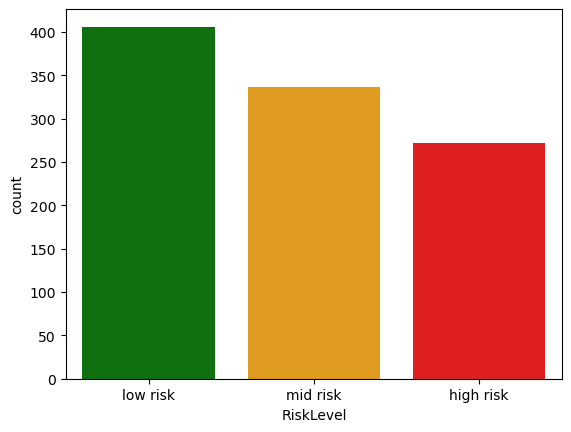

In [28]:
risk_order = ["low risk", "mid risk", "high risk"]
p_colors = ['green', 'orange', 'red']
sns.countplot(x="RiskLevel", data=data, order=risk_order, palette=p_colors)

#### Risk Level With respect to Age

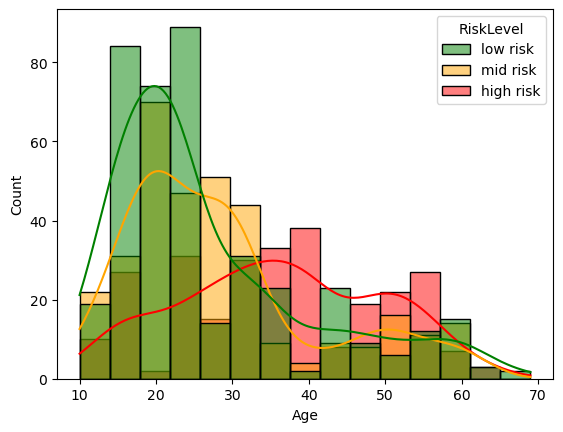

In [29]:
sns.histplot(data=data, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show() 

* Pregnant women aged below 24 years mostly has low health risk.
* risks will start to increase after that age (starting from the age of 25 years).
* the health risk of pregnant women over 59 years old is decreased

### Risk level with respect to Systolic

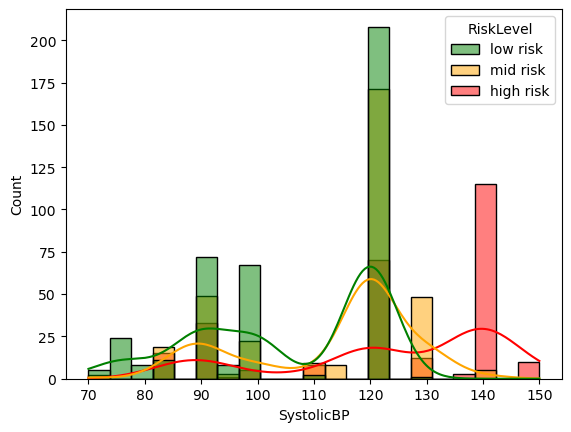

In [30]:
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Pregnant women with upper value of blood pressure >= 100 mmHg mostly has low health risk.
* The higher pregnant women's blood pressure, the higher the health risk

### Risk level with respect to DiastolicBP

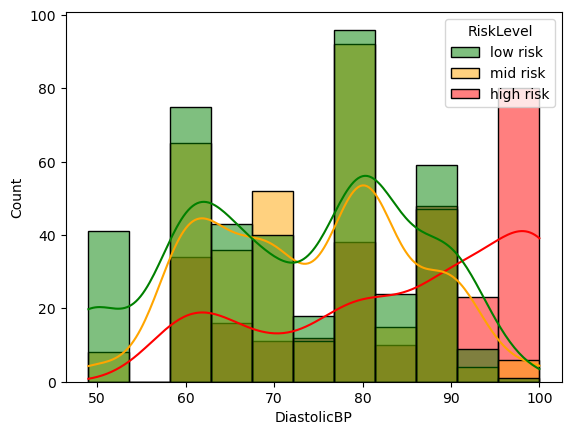

In [31]:
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

### Risk level with respect to BloodSugar

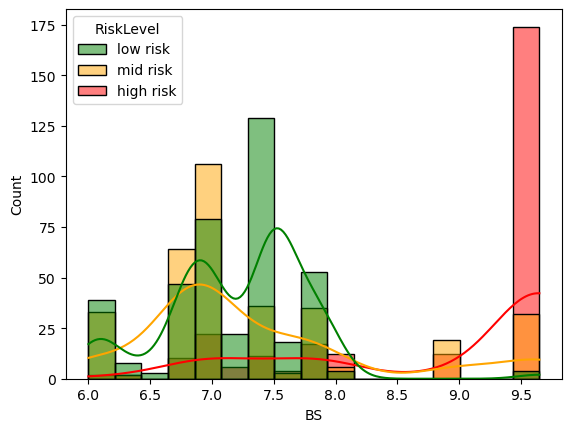

In [32]:
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Almost every pregnant women with blood glucose level >= 8 has high health risk.
* But otherwise, they seems to have lower health risk with blood glucose < 8

### Risk level with respect to BodyTemp

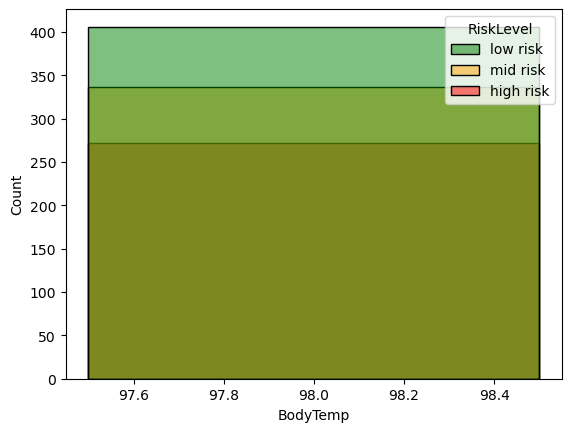

In [33]:
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Most pregnant women seem to have a body temperature of 98 F, which is normal body temperature
* Pregnant women with body temperature >= 100 mostly has higher health risk

### Risk level with respect to HeartRate

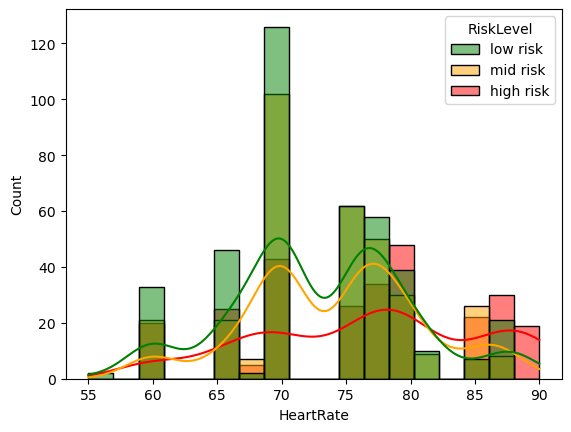

In [34]:
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Health risks seem to be getting higher along with the number of heart rate.

### Step 3: Data Partition

#### Splitting Dataset

 split dataset into 70% train data and 30% test data.

In [35]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed


x = data_combined.drop(['RiskLevel'],axis=1)
y = data_combined[['RiskLevel']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=77)

### 1. logistic Regression

#### Step 4: Model Building

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [37]:
output.intercept_  # beto 

array([-0.00135422,  0.00103347,  0.00032076])

In [38]:
output.coef_  # Beta 1 -- 

array([[-1.46387493e-02,  2.02047227e-02,  1.57347389e-02,
         9.00191748e-01, -1.31996749e-01,  3.28713326e-02],
       [ 5.94858963e-03, -3.15891307e-02,  9.49081899e-03,
        -5.85370371e-01,  1.00726449e-01, -3.31618758e-02],
       [ 8.69015969e-03,  1.13844081e-02, -2.52255579e-02,
        -3.14821376e-01,  3.12703004e-02,  2.90543154e-04]])

In [39]:
output.feature_names_in_

array(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
      dtype=object)

In [40]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
762,33.0,115.0,65,7.00,98.0,70.0,2
605,41.0,120.0,80,7.50,98.0,75.0,1
772,60.0,120.0,85,9.65,98.0,60.0,2
184,60.0,120.0,80,6.10,98.0,75.0,1
619,29.0,130.0,70,7.50,98.0,78.0,2


In [41]:
# Step 6 : Predictions on Train Dataset

In [42]:
train['Probability']= output.predict_proba(X_train)[:,1]  # MODEL = dt
train.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Probability
762,33.0,115.0,65,7.00,98.0,70.0,2,0.425882
605,41.0,120.0,80,7.50,98.0,75.0,1,0.373261
772,60.0,120.0,85,9.65,98.0,60.0,2,0.203485
184,60.0,120.0,80,6.10,98.0,75.0,1,0.516146
619,29.0,130.0,70,7.50,98.0,78.0,2,0.201439


In [43]:
train['Prediction']=output.predict(X_train)  # MODEL = dt
train.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Probability,Prediction
762,33.0,115.0,65,7.00,98.0,70.0,2,0.425882,2
605,41.0,120.0,80,7.50,98.0,75.0,1,0.373261,2
772,60.0,120.0,85,9.65,98.0,60.0,2,0.203485,0
184,60.0,120.0,80,6.10,98.0,75.0,1,0.516146,1
619,29.0,130.0,70,7.50,98.0,78.0,2,0.201439,2


In [44]:
# Step 7 : Model Performance Metrics

In [45]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Prediction'],train['RiskLevel'])
print(matrix)

[[141   9  39]
 [ 25 204 118]
 [ 28  64  81]]


In [46]:
#### Final accuracy of Model Before Pruning 

In [47]:
from sklearn.metrics import classification_report
print(classification_report(train['RiskLevel'], train['Prediction']))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       194
           1       0.59      0.74      0.65       277
           2       0.47      0.34      0.39       238

    accuracy                           0.60       709
   macro avg       0.60      0.60      0.59       709
weighted avg       0.59      0.60      0.59       709



In [48]:
# Step 8 : Predictions on Test Dataset

In [49]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
717,13.0,90.0,65,7.9,98.0,80.0,2
93,23.0,120.0,90,7.8,98.0,60.0,2
346,18.0,100.0,70,6.9,98.0,76.0,1
38,45.0,120.0,95,6.1,98.0,66.0,1
716,17.0,120.0,80,6.7,98.0,76.0,2


In [50]:
test['Predicted']=output.predict(X_test)
test.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Predicted
717,13.0,90.0,65,7.9,98.0,80.0,2,1
93,23.0,120.0,90,7.8,98.0,60.0,2,1
346,18.0,100.0,70,6.9,98.0,76.0,1,1
38,45.0,120.0,95,6.1,98.0,66.0,1,1
716,17.0,120.0,80,6.7,98.0,76.0,2,1


In [51]:
# Step 9 : Model Performance Metrics on Test data 

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['RiskLevel'])
print(confusion_matrix)

[[60  2 17]
 [ 6 94 50]
 [12 33 31]]


In [53]:
# Sensitivity & Specificity

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test['RiskLevel'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        78
           1       0.63      0.73      0.67       129
           2       0.41      0.32      0.36        98

    accuracy                           0.61       305
   macro avg       0.60      0.60      0.60       305
weighted avg       0.59      0.61      0.59       305



### 2. decision tree

#### Step 4: Model Building

In [55]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [56]:
# Step 5: Plotting the Tree 

In [57]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,RiskLevel,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
762,2,33.0,115.0,65,7.00,98.0,70.0
605,1,41.0,120.0,80,7.50,98.0,75.0
772,2,60.0,120.0,85,9.65,98.0,60.0
184,1,60.0,120.0,80,6.10,98.0,75.0
619,2,29.0,130.0,70,7.50,98.0,78.0


In [58]:
independent_variable = list(train.columns[1:])
independent_variable

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

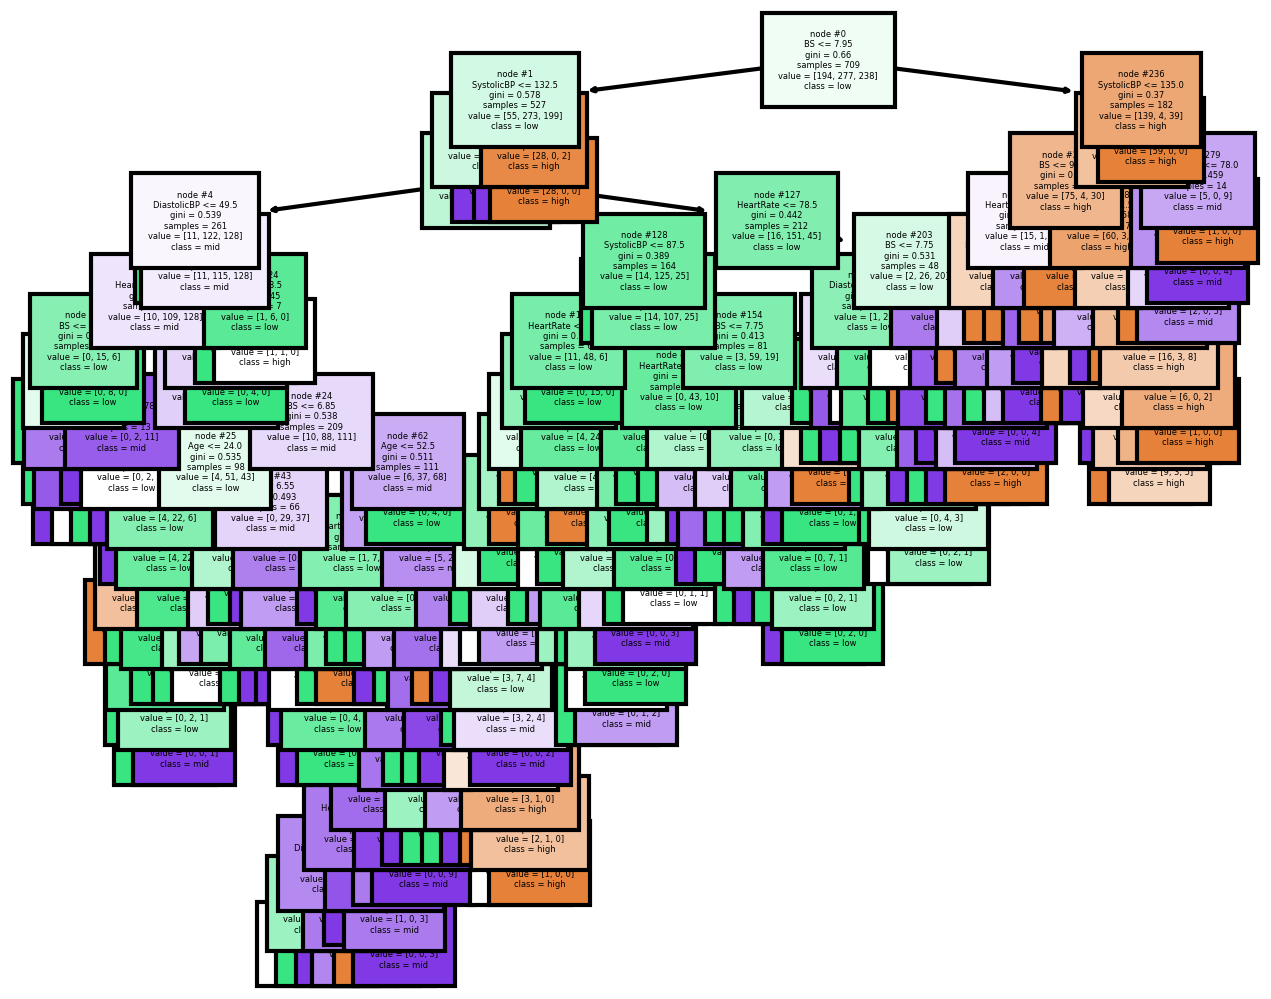

In [59]:
from sklearn import tree
import matplotlib.pyplot as plt

RiskLevel = ['high', 'low','mid']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = RiskLevel, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_train,dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       194
           1       0.95      0.92      0.94       277
           2       0.91      0.92      0.91       238

    accuracy                           0.93       709
   macro avg       0.93      0.94      0.93       709
weighted avg       0.93      0.93      0.93       709



In [61]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=5)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=200)

In [62]:
params = { 'min_samples_split': [300,399,250,450], ## Parent 
           'min_samples_leaf': [60,70,90,100,50], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [60, 70, 90, 100, 50],
                         'min_samples_split': [300, 399, 250, 450]},
             verbose=1)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_train,dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       194
           1       0.66      0.75      0.70       277
           2       0.55      0.37      0.44       238

    accuracy                           0.65       709
   macro avg       0.64      0.66      0.64       709
weighted avg       0.63      0.65      0.63       709



In [65]:
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78        78
           1       0.72      0.78      0.75       129
           2       0.56      0.36      0.44        98

    accuracy                           0.68       305
   macro avg       0.66      0.68      0.65       305
weighted avg       0.66      0.68      0.66       305



### 3. Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
ModelR = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

ModelR.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

In [67]:
from sklearn.tree import export_graphviz
import pydot

In [68]:
list(X_train.columns)

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

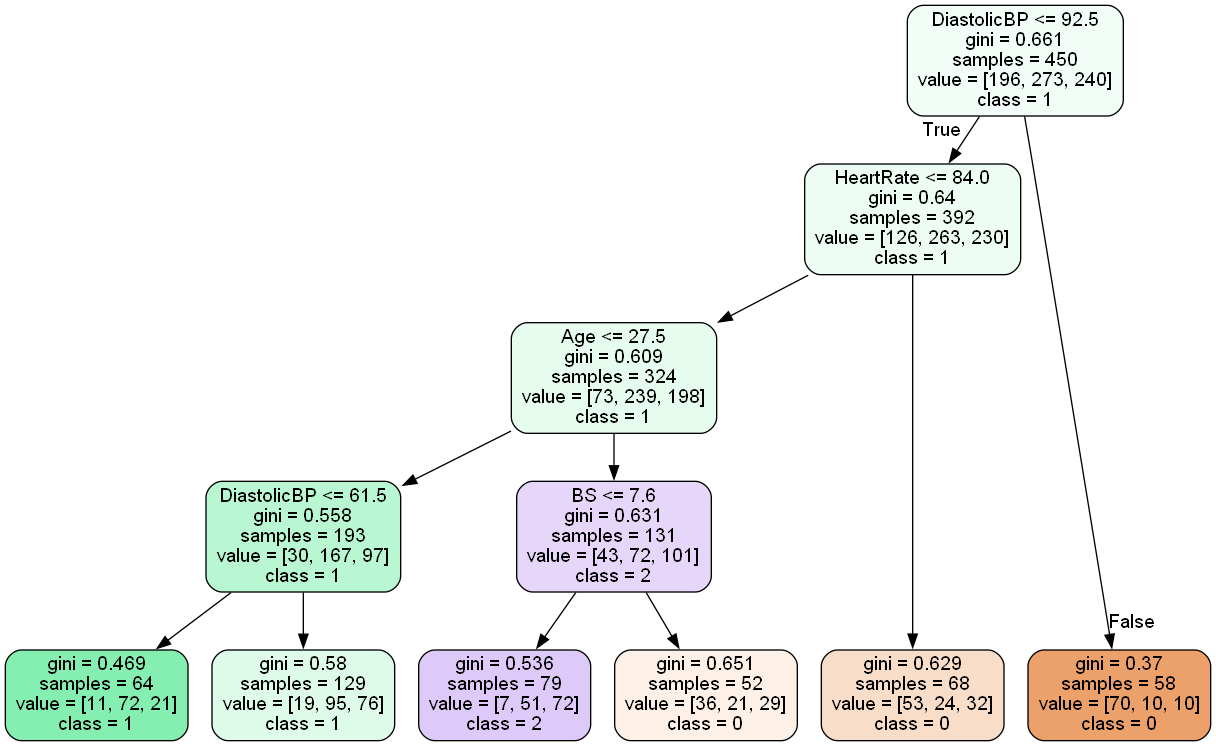

In [69]:
tree = ModelR.estimators_[9]  # specify the tree number   
y =['0','1','2'] 
feature_list = list(X_train.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=y,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

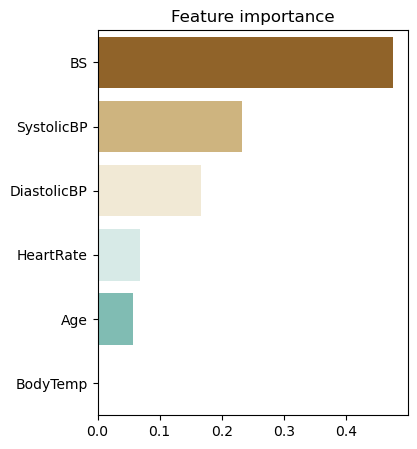

In [70]:
# Plot features importances
imp = pd.Series(data=ModelR.feature_importances_, index=ModelR.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(4,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

In [71]:
## for random forest algorithm Blood Sugar is the most important variable and the second most is SystolicBP

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_train,ModelR.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       194
           1       0.66      0.82      0.73       277
           2       0.67      0.43      0.52       238

    accuracy                           0.70       709
   macro avg       0.71      0.70      0.69       709
weighted avg       0.70      0.70      0.69       709



In [73]:
print(classification_report(y_test,ModelR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        78
           1       0.70      0.86      0.77       129
           2       0.73      0.38      0.50        98

    accuracy                           0.72       305
   macro avg       0.72      0.72      0.70       305
weighted avg       0.72      0.72      0.70       305



* Logistic algorithm

accuracy for train is 60

accuracy for test is 61

* Decision tree 

accuracy for train is 65

accuracy for test is 68

* Random Forest

accuracy for train is 70

accuracy for test is 73

In [ ]:
 # Conclusion

After doing some analysis on this dataset, we can conclude that BS or blood glucose level is the most important variable in determining the health level of pregnant women. 
Pregnant women who have high blood glucose level tend to have high health risks. 

In [74]:
# Business Submission

In [75]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
762,33.0,115.0,65,7.00,98.0,70.0
605,41.0,120.0,80,7.50,98.0,75.0
772,60.0,120.0,85,9.65,98.0,60.0
184,60.0,120.0,80,6.10,98.0,75.0
619,29.0,130.0,70,7.50,98.0,78.0
...,...,...,...,...,...,...
235,28.0,120.0,80,9.00,98.0,76.0
980,50.0,140.0,90,9.65,98.0,77.0
596,21.0,75.0,50,7.50,98.0,60.0
607,45.0,120.0,95,7.50,98.0,66.0


In [76]:
# Model Export

In [77]:
import picklec

pickle.dump(dt, open(r"C:\Users\HP\Desktop\Cloud\cloud_maternal_health_risk\Build.pkl",'wb'))  #model = dt # Exporting model from python to laptop